<a href="https://colab.research.google.com/github/Ryo-Neko/benkyokai2020/blob/master/ushikai_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Antsを解きましょう

In [0]:
import numpy as np
import pandas as pd

In [0]:
L = 10
n = 3
x = [2, 6, 7]

In [0]:
# 最小値を求める

left = 0
right = L

all_result = pd.DataFrame()

for ant in x:
    dist = pd.DataFrame({"左": [ant - left], "右": [right - ant]})
    all_result = pd.concat([all_result, dist], axis=0)

In [0]:
all_result

,左,右
0,2,8
0,6,4
0,7,3


In [0]:
all_result.idxmin(axis=1) # The state of ants ...

0    左
0    右
0    右
dtype: object

In [0]:
all_result.min(axis=1).max() # How long ...

4

In [0]:
# 最大値を求める

left = 0
right = L

all_result = pd.DataFrame()

for ant in x:
    dist = pd.DataFrame({"左": [ant - left], "右": [right - ant]})
    all_result = pd.concat([all_result, dist], axis=0)

In [0]:
all_result.idxmax(axis=1) # The state of ants ...

0    右
0    左
0    左
dtype: object

In [0]:
all_result.max(axis=1).max() # How long ...

8

# COVID19

## データを読み込む・抽出してみる

In [0]:
!pip install japanize_matplotlib

     |████████████████████████████████| 4.1MB 2.8MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.0.5-cp36-none-any.whl size=4118721 sha256=dd016981ef48d8267b66829cda933b93e695966d571a4a12628a6408656054ab
  Stored in directory: /root/.cache/pip/wheels/6c/8a/08/4a784957da9f3c2b4839b4986be2fba2a481877318948be52c
Successfully built japanize-matplotlib


In [0]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib

/usr/local/lib/python3.6/dist-packages/japanize_matplotlib/__init__.py:13: MatplotlibDeprecationWarning: 
The createFontList function was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use FontManager.addfont instead.
  font_list = font_manager.createFontList(font_files)


In [0]:
pd.set_option('display.max_rows', 1200)
pd.get_option("display.max_columns", 1000)

0

In [0]:
df = pd.read_csv("/content/drive/My Drive/datasets/signate/covid19/罹患者.csv", header=0, index_col=None)
df

,罹患者id,都道府県コード,都道府県別罹患者No,発熱観察日,受診日,公表日,回復日,死亡日,受診都道府県,受診都道府県緯度,受診都道府県経度,居住地,居住地緯度,居住地経度,年代,性別,職業,海外渡航歴ﾌﾗｸﾞ,海外渡航先,帰国日,ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ,症状・経過,行動歴,濃厚接触者状況,情報源,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,1-1,1.0,1.0,2020/01/26,2020/01/27,2020/01/28,NaN,NaN,北海道,#NAME?,#NAME?,中国（武漢市）,#NAME?,#NAME?,40代,女性,NaN,1,NaN,NaN,0.0,1月21日に来日し、22日より北海道を観光。\n1月26日 体調不良のため外出せず。夜間に咳...,1月21日、２名で来日し東京都内の知人宅に宿泊。\n1月22日、３名で東京から北海道に移動し...,濃厚接触者を特定し\n健康観察終了,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1-2,1.0,2.0,2020/01/31,2020/02/03,2020/02/14,NaN,NaN,北海道,#NAME?,#NAME?,札幌市,#NAME?,#NAME?,50代,男性,自営業,0,NaN,NaN,0.0,1月31日 発熱、咳、倦怠感が出現。\n2月 3日 石狩振興局管内の医療機関Aを受診。\n2...,1月21日、２名で来日し東京都内の知人宅に宿泊。\n1月22日、３名で東京から北海道に移動し...,健康観察実施中,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1-3,1.0,3.0,2020/02/12,2020/02/15,2020/02/19,NaN,NaN,北海道,#NAME?,#NAME?,札幌市,#NAME?,#NAME?,40代,男性,会社員,0,NaN,NaN,0.0,2月 8日 倦怠感、筋肉痛、関節痛が出現\n2月12日 発熱、咳が出現\n2月13日 札幌市...,2月1日から2月12日までの期間、No.5の男性（2月19日感染判明）とともに、雪まつり大通...,札幌市公表中,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1-4,1.0,4.0,2020/02/03,2020/02/07,2020/02/19,NaN,NaN,北海道,#NAME?,#NAME?,渡島総合振興局管内\n（七飯町）,#NAME?,#NAME?,60代,男性,議会議員,0,NaN,NaN,0.0,2月 3日 微熱、咽頭痛。\n2月 7日 渡島総合振興局管内の医療機関Aを受診。\n2月13...,本人からの申告によれば、海外渡航歴は無し。\n濃厚接触者48名について保健所が健康観察を行う...,濃厚接触者を特定し\n健康観察終了,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1-5,1.0,5.0,2020/02/18,2020/02/19,2020/02/20,NaN,NaN,北海道,#NAME?,#NAME?,札幌市,#NAME?,#NAME?,40代,男性,会社員,0,NaN,NaN,0.0,2月15日 悪寒、発汗、倦怠感、筋肉痛、関節痛が出現。\n2月18日 発熱、筋肉痛、咳、痰が...,2月1日から2月12日までの期間、No.3の男性（2月18日感染判明）とともに、雪まつり大通...,札幌市公表中,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#NAME?,#NAME?,NaN,#NAME?,#NAME?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#NAME?,#NAME?,NaN,#NAME?,#NAME?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#NAME?,#NAME?,NaN,#NAME?,#NAME?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#NAME?,#NAME?,NaN,#NAME?,#NAME?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df_info = pd.read_csv("/content/drive/My Drive/datasets/signate/covid19/罹患者関係.csv", header=0, index_col=None)
df_info.head()

,罹患者id1,罹患者id2,関係性,都道府県,場所,場所緯度,場所経度,情報源
0,1-3,1-5,不明,兵庫県,さっぽろ雪まつり,#NAME?,#NAME?,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...
1,28-5,20-2,不明,兵庫県,Soap opera classics-Umeda,NaN,NaN,https://www.city.himeji.lg.jp/emergencyinfo/cm...
2,28-24,20-2,不明,兵庫県,Soap opera classics-Umeda,NaN,NaN,https://www.city.kobe.lg.jp/a57337/kenko/healt...
3,1-4,1-12,不明,北海道,不明,#NAME?,#NAME?,http://www.pref.hokkaido.lg.jp/hf/kth/kak/kisy...
4,1-5,1-3,不明,北海道,さっぽろ雪まつり,#NAME?,#NAME?,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...


In [0]:
df[df["罹患者id"] == "28-24"]

,罹患者id,都道府県コード,都道府県別罹患者No,発熱観察日,受診日,公表日,回復日,死亡日,受診都道府県,受診都道府県緯度,受診都道府県経度,居住地,居住地緯度,居住地経度,年代,性別,職業,海外渡航歴ﾌﾗｸﾞ,海外渡航先,帰国日,ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ,症状・経過,行動歴,濃厚接触者状況,情報源,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
779,28-24,28.0,24.0,2020/02/23,NaN,2020/03/10,NaN,NaN,兵庫県,#NAME?,#NAME?,神戸市,#NAME?,#NAME?,20代,女性,会社員,0,NaN,NaN,0.0,2月23日（日曜日） 発熱あり\n2月24日（月曜日） 下熱、以降、発熱ほかの症状なし\n3...,2/19に大阪のSoap operaライブに参加\n\n3月6日（金曜日）～ 休暇取得\n\...,同居人２名のうち１名が濃厚接触者,https://web.pref.hyogo.lg.jp/kk03/corona_hasse...,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df = df.replace("#NAME?", np.nan)
df_info = df_info.replace("#NAME?", np.nan)

In [0]:
df

,罹患者id,都道府県コード,都道府県別罹患者No,発熱観察日,受診日,公表日,回復日,死亡日,受診都道府県,受診都道府県緯度,受診都道府県経度,居住地,居住地緯度,居住地経度,年代,性別,職業,海外渡航歴ﾌﾗｸﾞ,海外渡航先,帰国日,ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ,症状・経過,行動歴,濃厚接触者状況,情報源
0,1-1,1.0,1.0,2020/01/26,2020/01/27,2020/01/28,NaN,NaN,北海道,NaN,NaN,中国（武漢市）,NaN,NaN,40代,女性,NaN,1,NaN,NaN,0.0,1月21日に来日し、22日より北海道を観光。\n1月26日 体調不良のため外出せず。夜間に咳...,1月21日、２名で来日し東京都内の知人宅に宿泊。\n1月22日、３名で東京から北海道に移動し...,濃厚接触者を特定し\n健康観察終了,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...
1,1-2,1.0,2.0,2020/01/31,2020/02/03,2020/02/14,NaN,NaN,北海道,NaN,NaN,札幌市,NaN,NaN,50代,男性,自営業,0,NaN,NaN,0.0,1月31日 発熱、咳、倦怠感が出現。\n2月 3日 石狩振興局管内の医療機関Aを受診。\n2...,1月21日、２名で来日し東京都内の知人宅に宿泊。\n1月22日、３名で東京から北海道に移動し...,健康観察実施中,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...
2,1-3,1.0,3.0,2020/02/12,2020/02/15,2020/02/19,NaN,NaN,北海道,NaN,NaN,札幌市,NaN,NaN,40代,男性,会社員,0,NaN,NaN,0.0,2月 8日 倦怠感、筋肉痛、関節痛が出現\n2月12日 発熱、咳が出現\n2月13日 札幌市...,2月1日から2月12日までの期間、No.5の男性（2月19日感染判明）とともに、雪まつり大通...,札幌市公表中,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...
3,1-4,1.0,4.0,2020/02/03,2020/02/07,2020/02/19,NaN,NaN,北海道,NaN,NaN,渡島総合振興局管内\n（七飯町）,NaN,NaN,60代,男性,議会議員,0,NaN,NaN,0.0,2月 3日 微熱、咽頭痛。\n2月 7日 渡島総合振興局管内の医療機関Aを受診。\n2月13...,本人からの申告によれば、海外渡航歴は無し。\n濃厚接触者48名について保健所が健康観察を行う...,濃厚接触者を特定し\n健康観察終了,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...
4,1-5,1.0,5.0,2020/02/18,2020/02/19,2020/02/20,NaN,NaN,北海道,NaN,NaN,札幌市,NaN,NaN,40代,男性,会社員,0,NaN,NaN,0.0,2月15日 悪寒、発汗、倦怠感、筋肉痛、関節痛が出現。\n2月18日 発熱、筋肉痛、咳、痰が...,2月1日から2月12日までの期間、No.3の男性（2月18日感染判明）とともに、雪まつり大通...,札幌市公表中,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df.dropna(how='all', axis=0, inplace=True)
df_info.dropna(how='all', axis=0, inplace=True)

In [0]:
df.dropna(how='all', axis=1, inplace=True)
df_info.dropna(how='all', axis=1, inplace=True)

In [0]:
df_info

,罹患者id1,罹患者id2,関係性,都道府県,場所,情報源
0,1-3,1-5,不明,兵庫県,さっぽろ雪まつり,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...
1,28-5,20-2,不明,兵庫県,Soap opera classics-Umeda,https://www.city.himeji.lg.jp/emergencyinfo/cm...
2,28-24,20-2,不明,兵庫県,Soap opera classics-Umeda,https://www.city.kobe.lg.jp/a57337/kenko/healt...
3,1-4,1-12,不明,北海道,不明,http://www.pref.hokkaido.lg.jp/hf/kth/kak/kisy...
4,1-5,1-3,不明,北海道,さっぽろ雪まつり,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...
...,...,...,...,...,...,...
456,27-108,27-96,濃厚接触者,大阪府,不明,http://www.pref.osaka.lg.jp/hodo/attach/hodo-3...
457,27-109,27-88,接触有(3/4),大阪府,不明,http://www.pref.osaka.lg.jp/hodo/attach/hodo-3...
458,27-110,27-60,濃厚接触者,大阪府,不明,http://www.pref.osaka.lg.jp/hodo/attach/hodo-3...
459,27-111,27-12,同居家族,大阪府,不明,http://www.pref.osaka.lg.jp/hodo/attach/hodo-3...


In [0]:
?pd.merge

In [0]:
df_merge = pd.merge(df, df_info, how='outer', left_on="罹患者id", right_on="罹患者id1")
df_merge

,罹患者id,都道府県コード,都道府県別罹患者No,発熱観察日,受診日,公表日,回復日,死亡日,受診都道府県,受診都道府県緯度,受診都道府県経度,居住地,年代,性別,職業,海外渡航歴ﾌﾗｸﾞ,海外渡航先,帰国日,ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ,症状・経過,行動歴,濃厚接触者状況,情報源_x,罹患者id1,罹患者id2,関係性,都道府県,場所,情報源_y
0,1-1,1.0,1.0,2020/01/26,2020/01/27,2020/01/28,NaN,NaN,北海道,NaN,NaN,中国（武漢市）,40代,女性,NaN,1,NaN,NaN,0.0,1月21日に来日し、22日より北海道を観光。\n1月26日 体調不良のため外出せず。夜間に咳...,1月21日、２名で来日し東京都内の知人宅に宿泊。\n1月22日、３名で東京から北海道に移動し...,濃厚接触者を特定し\n健康観察終了,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,NaN,NaN,NaN
1,1-2,1.0,2.0,2020/01/31,2020/02/03,2020/02/14,NaN,NaN,北海道,NaN,NaN,札幌市,50代,男性,自営業,0,NaN,NaN,0.0,1月31日 発熱、咳、倦怠感が出現。\n2月 3日 石狩振興局管内の医療機関Aを受診。\n2...,1月21日、２名で来日し東京都内の知人宅に宿泊。\n1月22日、３名で東京から北海道に移動し...,健康観察実施中,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,NaN,NaN,NaN
2,1-3,1.0,3.0,2020/02/12,2020/02/15,2020/02/19,NaN,NaN,北海道,NaN,NaN,札幌市,40代,男性,会社員,0,NaN,NaN,0.0,2月 8日 倦怠感、筋肉痛、関節痛が出現\n2月12日 発熱、咳が出現\n2月13日 札幌市...,2月1日から2月12日までの期間、No.5の男性（2月19日感染判明）とともに、雪まつり大通...,札幌市公表中,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,1-3,1-5,不明,兵庫県,さっぽろ雪まつり,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...
3,1-4,1.0,4.0,2020/02/03,2020/02/07,2020/02/19,NaN,NaN,北海道,NaN,NaN,渡島総合振興局管内\n（七飯町）,60代,男性,議会議員,0,NaN,NaN,0.0,2月 3日 微熱、咽頭痛。\n2月 7日 渡島総合振興局管内の医療機関Aを受診。\n2月13...,本人からの申告によれば、海外渡航歴は無し。\n濃厚接触者48名について保健所が健康観察を行う...,濃厚接触者を特定し\n健康観察終了,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,1-4,1-12,不明,北海道,不明,http://www.pref.hokkaido.lg.jp/hf/kth/kak/kisy...
4,1-5,1.0,5.0,2020/02/18,2020/02/19,2020/02/20,NaN,NaN,北海道,NaN,NaN,札幌市,40代,男性,会社員,0,NaN,NaN,0.0,2月15日 悪寒、発汗、倦怠感、筋肉痛、関節痛が出現。\n2月18日 発熱、筋肉痛、咳、痰が...,2月1日から2月12日までの期間、No.3の男性（2月18日感染判明）とともに、雪まつり大通...,札幌市公表中,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,1-5,1-3,不明,北海道,さっぽろ雪まつり,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,47-1,47.0,1.0,2020/02/05,2020/02/12,2020/02/14,NaN,NaN,沖縄県,NaN,NaN,島尻郡,60代,女性,タクシー運転手,0,NaN,NaN,0.0,・２月１日 ：ダイヤモンドプリンセス号に乗船していた４名を乗車。\n・２月５日 ：咳がひどく...,調査中,調査中,https://www.pref.okinawa.jp/site/hoken/chiikih...,NaN,NaN,NaN,NaN,NaN,NaN
1058,47-2,47.0,2.0,2020/02/10,2020/02/18,2020/02/19,NaN,NaN,沖縄県,NaN,NaN,那覇市,60代,男性,タクシー運転手,0,NaN,NaN,0.0,・２月１日 ：ダイヤモンドプリンセス号に乗船していた乗客を乗車。\n・２月 10 日 ：倦怠...,調査中,調査中,https://www.pref.okinawa.jp/site/hoken/chiikih...,NaN,NaN,NaN,NaN,NaN,NaN
1059,47-3,47.0,3.0,2020/02/17,2020/02/20,2020/02/20,NaN,NaN,沖縄県,NaN,NaN,豊見城市,80代,男性,農業,0,NaN,NaN,0.0,・２月６日 ：微熱あり、咳なし、風邪気味。\n・２月 17 日 ：発熱 36.8 ℃、倦怠感...,調査中,調査中,https://www.pref.okinawa.jp/site/hoken/chiikih...,NaN,NaN,NaN,NaN,NaN,NaN
1060,NaN,NaN,NaN,2020/03/09,2020/03/13,2020/03/18,NaN,NaN,福岡県,NaN,NaN,福岡市,30代,女性,九州大学生,1,NaN,NaN,0.0,大学のフィンランドゼミ実習のため、２月１９日出国、３月９日帰福。\n３月９日帰福後、発熱、咳...,大学のフィンランドゼミ実習のため２月１９日出国。\n２月２０日から３月２日までロシアに滞在。...,・同居の家族なし\n・実習の同行者５名については、３月１８日、PCR検査実施。うち３名は検査...,https://www.pref.fukuoka.lg.jp/contents/bukan....,NaN,NaN,NaN,NaN,NaN,NaN


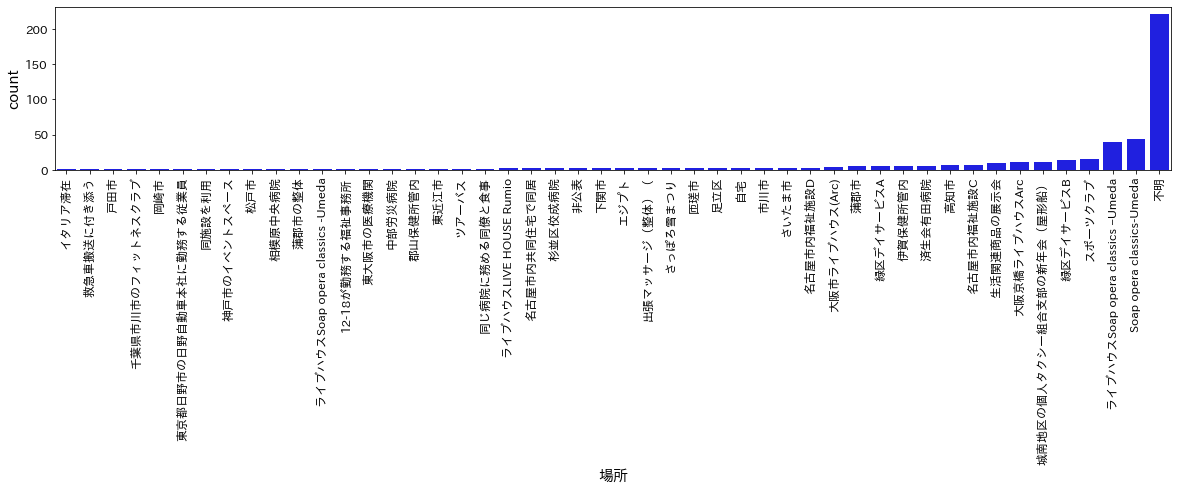

In [0]:
fig = plt.figure(figsize=(20, 3), facecolor='white')
ax = fig.add_subplot(111)
sns.countplot(x='場所', data=df_merge, color="blue", ax=ax, order=df_merge['場所'].value_counts().sort_values().index)
ax.tick_params(which='major', labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)
plt.show()
plt.close()

# 不明を削除したい

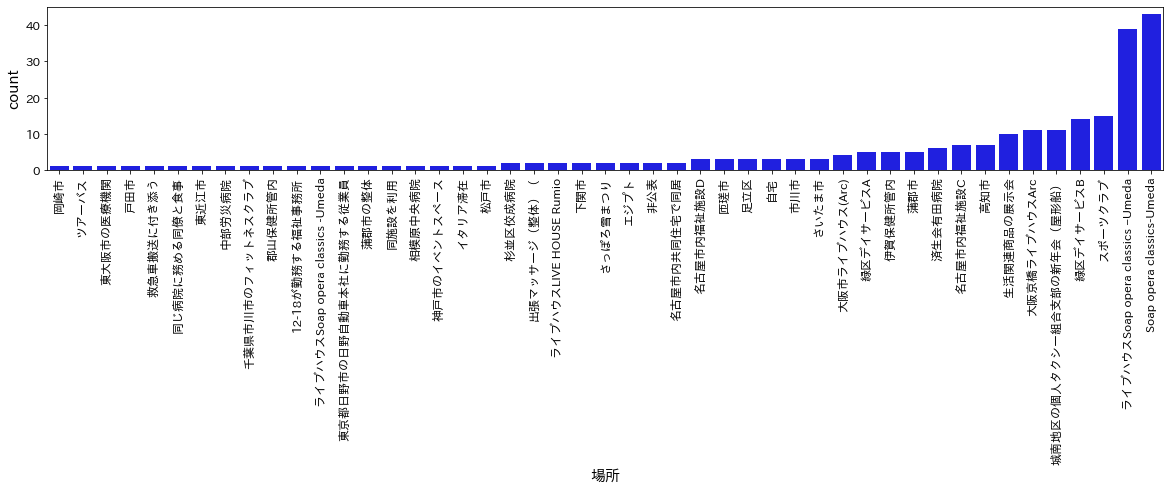

In [0]:
df_merge_dropped = df_merge[df_merge['場所'] != '不明']
fig = plt.figure(figsize=(20, 3), facecolor='white')
ax = fig.add_subplot(111)
sns.countplot(x='場所', data=df_merge_dropped, color="blue", ax=ax, order=df_merge_dropped['場所'].value_counts().sort_values().index)
ax.tick_params(which='major', labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)
plt.show()
plt.close()

# soap operaが3つある？！?!
# ライブハウスarcも？！

In [0]:
df_merge_dropped.loc[df_merge_dropped["場所"].str.contains("Soap opera").fillna(False), "場所"] = "Soap opera classics-Umeda"

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


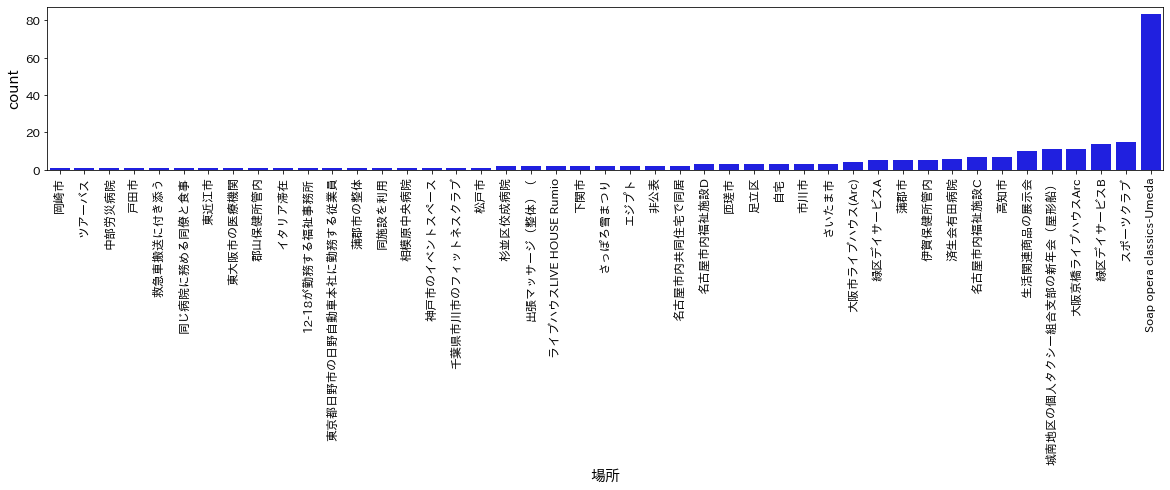

In [0]:
fig = plt.figure(figsize=(20, 3), facecolor='white')
ax = fig.add_subplot(111)
sns.countplot(x='場所', data=df_merge_dropped, color="blue", ax=ax, order=df_merge_dropped['場所'].value_counts().sort_values().index)
ax.tick_params(which='major', labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.xaxis.label.set_fontsize(15)
ax.yaxis.label.set_fontsize(15)
plt.show()
plt.close()

# ライブハウスarcも？！

In [0]:
# Soap Umedaで何が起きたのか

df_umeda = df_merge_dropped[df_merge_dropped['場所'] == "Soap opera classics-Umeda"]
df_umeda.head()

,罹患者id,都道府県コード,都道府県別罹患者No,発熱観察日,受診日,公表日,回復日,死亡日,受診都道府県,受診都道府県緯度,受診都道府県経度,居住地,年代,性別,職業,海外渡航歴ﾌﾗｸﾞ,海外渡航先,帰国日,ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ,症状・経過,行動歴,濃厚接触者状況,情報源_x,罹患者id1,罹患者id2,関係性,都道府県,場所,情報源_y
142,9-2,9.0,2.0,2020/02/25,2020/03/05,2020/03/05,NaN,NaN,栃木県,NaN,NaN,栃木県（県南健康福祉センター管内）,30代,女性,NaN,NaN,NaN,NaN,NaN,２月 25 日 発熱（37.4 度）及び咽頭違和感。\n ２月 27 日 県内の医療機関Ａ（...,２月 22 日 大阪府内において、ライブに参加。大阪市都島区のライブハウス（Arc）に滞\n...,・ 患者との濃厚接触者は、現時点で判明している者は、父のみ。父は、現時点で症状はな\n いも...,http://www.pref.tochigi.lg.jp/e04/welfare/hoke...,9-2,20-2,不明,栃木県,Soap opera classics-Umeda,http://www.pref.tochigi.lg.jp/e04/welfare/hoke...
186,13-67,13.0,67.0,NaN,2020/03/06,2020/03/10,NaN,NaN,東京都,NaN,NaN,都内,40代,女性,会社員,0,NaN,NaN,NaN,なし\n3月5日 新型コロナ受診相談窓口（帰国者・接触者電話相談センター）に相談\n3月6日...,2月23日 に都外ライブハウスに客として滞在\n3月4日 まで出勤,Soap opera classics-Umeda,https://catalog.data.metro.tokyo.lg.jp/dataset...,13-67,20-2,不明,東京都,Soap opera classics-Umeda,https://www.metro.tokyo.lg.jp/tosei/hodohappyo...
189,20-2,20.0,2.0,2020/02/23,2020/03/03,2020/03/06,NaN,NaN,長野県,NaN,NaN,佐久保管所管内,50代,女性,NaN,NaN,NaN,NaN,NaN,2月19日（水）大阪市内ライブハウス（Soap opera classics Umeda）で...,発症後の勤務は2/23（日）～24（月）、2/28（金）～3/1（日）。\n\n 詳細は現...,NaN,https://www.pref.nagano.lg.jp/hoken-shippei/ha...,20-2,20-2,不明,長野県,Soap opera classics-Umeda,https://www.pref.nagano.lg.jp/hoken-shippei/ha...
254,23-80,23.0,80.0,2020/03/07,2020/03/07,2020/03/08,NaN,NaN,愛知県,NaN,NaN,名古屋市,40代,女性,NaN,NaN,NaN,NaN,NaN,3月7日 発熱、咳。市内医療機関受診。\n3月8日 名古屋市衛生研究所による遺伝子検査の結果...,NaN,大阪市内のライブハウス利用していた,http://www.city.nagoya.jp/kenkofukushi/cmsfile...,23-80,20-2,不明,愛知県,Soap opera classics-Umeda,http://www.city.nagoya.jp/kenkofukushi/cmsfile...
298,24-5,24.0,5.0,NaN,NaN,2020/03/11,NaN,NaN,三重県,NaN,NaN,伊賀保健所管内,60代,女性,NaN,NaN,NaN,NaN,NaN,以前から花粉症症状あり。\n２月２４日以降、新たな症状なし,２月２４日（月）にSoap opera classics-Umedaで開催されたコンサートに参加,id24-3の濃厚接触者であり近親者,https://www.pref.mie.lg.jp/YAKUMUS/HP/m0068000...,24-5,20-2,不明,三重県,Soap opera classics-Umeda,https://www.pref.mie.lg.jp/YAKUMUS/HP/m0068000...


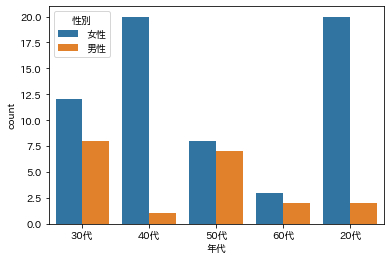

In [0]:
sns.countplot("年代", data=df_umeda, hue='性別')

## 何を見ようかな

In [0]:
df_merge.columns

Index(['罹患者id', '都道府県コード', '都道府県別罹患者No', '発熱観察日', '受診日', '公表日', '回復日', '死亡日',
       '受診都道府県', '受診都道府県緯度', '受診都道府県経度', '居住地', '年代', '性別', '職業', '海外渡航歴ﾌﾗｸﾞ',
       '海外渡航先', '帰国日', 'ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ', '症状・経過', '行動歴', '濃厚接触者状況',
       '情報源_x', '罹患者id1', '罹患者id2', '関係性', '都道府県', '場所', '情報源_y'],
      dtype='object')

In [0]:
df[df_merge['行動歴'].str.contains('海外渡航歴無し').fillna(False)]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,罹患者id,都道府県コード,都道府県別罹患者No,発熱観察日,受診日,公表日,回復日,死亡日,受診都道府県,受診都道府県緯度,受診都道府県経度,居住地,年代,性別,職業,海外渡航歴ﾌﾗｸﾞ,海外渡航先,帰国日,ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ,症状・経過,行動歴,濃厚接触者状況,情報源
205,11-25,11.0,25.0,2020/03/04,2020/03/09,2020/03/13,NaN,NaN,埼玉県,NaN,NaN,草加市,30代,男性,会社員（都内勤務）,1,NaN,NaN,NaN,3月4日（水曜日）\n \n 出勤 夜37.8度\n \n 5日（木曜日）\n \n 37....,令和2年2月23日～3月1日スペイン、イギリスに渡航,同居家族：なし\n 通勤は、東武スカイツリーラインを利用\n 濃厚接触者は調査中。,https://www.pref.saitama.lg.jp/a0701/covid19/j...
224,12-7,12.0,7.0,2020/02/14,2020/02/15,2020/02/20,NaN,NaN,千葉県,NaN,NaN,市川市,70代,女性,無職,0,NaN,NaN,0.0,2月14日：夜中発熱（38.8℃）\n2月15日：県内医療機関Aを受診。インフルエンザ陰性。...,発症前2週間以内に海外渡航歴はなく、肺炎患者との明確な接触も確認されていない。,NaN,https://www.pref.chiba.lg.jp/shippei/press/201...
226,12-9,12.0,9.0,2020/02/12,2020/02/12,2020/02/21,NaN,NaN,千葉県,NaN,NaN,市川市,60代,女性,教員,0,NaN,NaN,0.0,2月12日：嘔気出現。県内医療機関Aを受診。\n2月13日～19日（土曜日・日曜日を除く）：...,発症前2週間以内に海外渡航歴はなく、肺炎患者との明確な接触も確認されていない。,NaN,https://www.pref.chiba.lg.jp/shippei/press/201...
227,12-10,12.0,10.0,2020/02/16,2020/02/19,2020/02/22,NaN,NaN,千葉県,NaN,NaN,東京都,50代,女性,会社員,0,NaN,NaN,0.0,2月16日：倦怠感、関節痛、発熱（38℃台）出現。\n2月18日：実家（東葛南部医療圏）に帰...,発症前2週間以内に海外渡航歴はなく、肺炎患者との明確な接触も確認されていない。\n2月11日...,NaN,https://www.pref.chiba.lg.jp/shippei/press/201...
228,12-11,12.0,11.0,2020/02/12,2020/02/18,2020/02/22,NaN,NaN,千葉県,NaN,NaN,松戸市,40代,男性,会社員,0,NaN,NaN,0.0,2月12日：関節痛、筋肉痛が出現。広島県へ出張。\n2月13日：広島県から岐阜県へ出張。\n...,発症前2週間以内に海外渡航歴はなく、肺炎患者との明確な接触も確認されていない。\n発症後はマ...,NaN,https://www.pref.chiba.lg.jp/shippei/press/201...
229,12-12,12.0,12.0,2020/02/22,2020/02/25,2020/02/25,NaN,NaN,千葉県,NaN,NaN,いすみ市,50代,男性,医師,0,NaN,NaN,1.0,2月22日微熱を呈する（37.4℃）\n2月25日県内医療機関Aを受診。検体採取（咽頭ぬぐい...,2月12日～18日までクルーズ船「ダイヤモンド・プリンセス」にDPAT（※）として乗船。\n...,クルーズ派遣,https://www.pref.chiba.lg.jp/shippei/press/201...
230,12-13,12.0,13.0,2020/02/22,2020/02/25,2020/02/25,NaN,NaN,千葉県,NaN,NaN,市川市,60代,男性,無職,1,NaN,NaN,1.0,2月22日微熱を呈する（37.0℃）\n2月24日保健所が実施した健康フォローアップで上記発...,2月15日にクルーズ船「ダイヤモンド・プリンセス」の乗客として下船に向けた検査検体を採取。2...,クルーズ乗客,https://www.pref.chiba.lg.jp/shippei/press/201...
231,12-14,12.0,14.0,2020/02/12,2020/02/14,2020/02/26,NaN,NaN,千葉県,NaN,NaN,四街道市,70代,男性,無職,1,NaN,NaN,1.0,2月12日発熱（37.8℃）\n2月14日クルーズ船「ダイヤモンド・プリンセス」の乗客として...,2月21日～25日まで自宅に待機していた。,クルーズ乗客,https://www.pref.chiba.lg.jp/shippei/press/201...
232,12-15,12.0,15.0,2020/02/22,2020/02/29,2020/03/01,NaN,NaN,千葉県,NaN,NaN,船橋市,20代,男性,学生,0,NaN,NaN,0.0,2月22日\n・朝、37.5℃の発熱。市販薬を服用。\n2月27日\n・下痢、吐気が出現。\...,・2月19日（水曜日）13時から15時の間に津田沼パルコを利用。同店の従業員については、これ...,2月25日\n・患者の祖母（70歳代）が大船駅で倒れ入院。27日に新型コロナウイルス陽性が判...,https://www.pref.chiba.lg.jp/shippei/press/201...
233,12-16,12.0,16.0,2020/02/16,NaN,2020/03/03,NaN,NaN,千葉県,NaN,NaN,市川市,80代,女性,無職,NaN,NaN,NaN,0.0,2月16日：鼻水、咽頭痛が出現。\n2月29日：軽い咳が出現。\n3月2日：症状が継続してい...,患者への調査により、発症後に「エース＜アクシスコア＞市川」を利用していた。（利用状況等は調査中）,NaN,https://www.pref.chiba.lg.jp/shippei/press/201...


## 時系列解析を忘れていた

In [0]:
new_patient = df_merge['発熱観察日'].value_counts().sort_index()

In [0]:
new_patient.index = new_patient.index.str.replace("2019", "2020", )
new_patient.sort_index(inplace=True)
new_patient

2020/01/03     1
2020/01/20     2
2020/01/21     1
2020/01/23     2
2020/01/24     2
2020/01/25     1
2020/01/26     1
2020/01/29     1
2020/01/30     1
2020/01/31     2
2020/02/01     2
2020/02/02     6
2020/02/03     6
2020/02/04     5
2020/02/05     5
2020/02/06     4
2020/02/07     4
2020/02/08     2
2020/02/09     1
2020/02/10     7
2020/02/12     7
2020/02/13     4
2020/02/14     7
2020/02/15     4
2020/02/16    10
2020/02/17    19
2020/02/18    19
2020/02/19    13
2020/02/20    19
2020/02/21    14
2020/02/22    19
2020/02/23    31
2020/02/24    25
2020/02/25    42
2020/02/26    26
2020/02/27    19
2020/02/28    36
2020/02/29    22
2020/03/01    35
2020/03/02    27
2020/03/03    37
2020/03/04    27
2020/03/05    26
2020/03/05     1
2020/03/06    26
2020/03/07    32
2020/03/08    24
2020/03/09     1
2020/03/09    34
2020/03/10    19
2020/03/11    21
2020/03/12    17
2020/03/13    17
2020/03/14    11
2020/03/15    10
2020/03/16     6
2020/03/17     8
2020/03/18     3
2020/03/19    

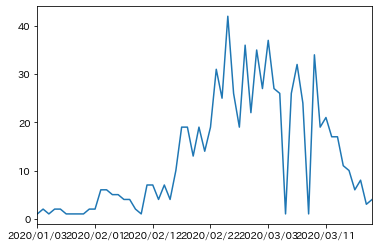

In [0]:
new_patient.plot()

In [0]:
new_patient.index = pd.to_datetime(new_patient.index)
new_patient

2020-01-03     1
2020-01-20     2
2020-01-21     1
2020-01-23     2
2020-01-24     2
2020-01-25     1
2020-01-26     1
2020-01-29     1
2020-01-30     1
2020-01-31     2
2020-02-01     2
2020-02-02     6
2020-02-03     6
2020-02-04     5
2020-02-05     5
2020-02-06     4
2020-02-07     4
2020-02-08     2
2020-02-09     1
2020-02-10     7
2020-02-12     7
2020-02-13     4
2020-02-14     7
2020-02-15     4
2020-02-16    10
2020-02-17    19
2020-02-18    19
2020-02-19    13
2020-02-20    19
2020-02-21    14
2020-02-22    19
2020-02-23    31
2020-02-24    25
2020-02-25    42
2020-02-26    26
2020-02-27    19
2020-02-28    36
2020-02-29    22
2020-03-01    35
2020-03-02    27
2020-03-03    37
2020-03-04    27
2020-03-05    26
2020-03-05     1
2020-03-06    26
2020-03-07    32
2020-03-08    24
2020-03-09     1
2020-03-09    34
2020-03-10    19
2020-03-11    21
2020-03-12    17
2020-03-13    17
2020-03-14    11
2020-03-15    10
2020-03-16     6
2020-03-17     8
2020-03-18     3
2020-03-19    

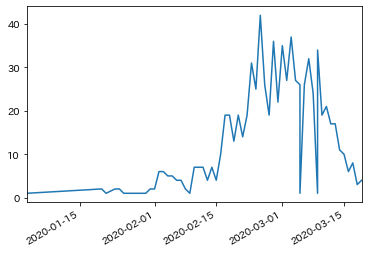

In [0]:
new_patient.plot()

In [0]:
df_merge['濃厚接触者状況'].str.extract("(.*感染.*)")

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
5,NaN
6,NaN
7,NaN
8,NaN
9,NaN


In [0]:
import pandas as pd

In [0]:
df_rikansha = pd.read_csv("/content/罹患者.csv")

In [0]:
df_rikansha

,罹患者id,都道府県コード,都道府県別罹患者No,発熱観察日,受診日,公表日,回復日,死亡日,受診都道府県,受診都道府県緯度,受診都道府県経度,居住地,居住地緯度,居住地経度,年代,性別,職業,海外渡航歴ﾌﾗｸﾞ,海外渡航先,帰国日,ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ,症状・経過,行動歴,濃厚接触者状況,情報源,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,1-1,1.0,1.0,2020/01/26,2020/01/27,2020/01/28,NaN,NaN,北海道,#NAME?,#NAME?,中国（武漢市）,#NAME?,#NAME?,40代,女性,NaN,1,NaN,NaN,0.0,1月21日に来日し、22日より北海道を観光。\n1月26日 体調不良のため外出せず。夜間に咳...,1月21日、２名で来日し東京都内の知人宅に宿泊。\n1月22日、３名で東京から北海道に移動し...,濃厚接触者を特定し\n健康観察終了,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1-2,1.0,2.0,2020/01/31,2020/02/03,2020/02/14,NaN,NaN,北海道,#NAME?,#NAME?,札幌市,#NAME?,#NAME?,50代,男性,自営業,0,NaN,NaN,0.0,1月31日 発熱、咳、倦怠感が出現。\n2月 3日 石狩振興局管内の医療機関Aを受診。\n2...,1月21日、２名で来日し東京都内の知人宅に宿泊。\n1月22日、３名で東京から北海道に移動し...,健康観察実施中,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1-3,1.0,3.0,2020/02/12,2020/02/15,2020/02/19,NaN,NaN,北海道,#NAME?,#NAME?,札幌市,#NAME?,#NAME?,40代,男性,会社員,0,NaN,NaN,0.0,2月 8日 倦怠感、筋肉痛、関節痛が出現\n2月12日 発熱、咳が出現\n2月13日 札幌市...,2月1日から2月12日までの期間、No.5の男性（2月19日感染判明）とともに、雪まつり大通...,札幌市公表中,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1-4,1.0,4.0,2020/02/03,2020/02/07,2020/02/19,NaN,NaN,北海道,#NAME?,#NAME?,渡島総合振興局管内\n（七飯町）,#NAME?,#NAME?,60代,男性,議会議員,0,NaN,NaN,0.0,2月 3日 微熱、咽頭痛。\n2月 7日 渡島総合振興局管内の医療機関Aを受診。\n2月13...,本人からの申告によれば、海外渡航歴は無し。\n濃厚接触者48名について保健所が健康観察を行う...,濃厚接触者を特定し\n健康観察終了,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1-5,1.0,5.0,2020/02/18,2020/02/19,2020/02/20,NaN,NaN,北海道,#NAME?,#NAME?,札幌市,#NAME?,#NAME?,40代,男性,会社員,0,NaN,NaN,0.0,2月15日 悪寒、発汗、倦怠感、筋肉痛、関節痛が出現。\n2月18日 発熱、筋肉痛、咳、痰が...,2月1日から2月12日までの期間、No.3の男性（2月18日感染判明）とともに、雪まつり大通...,札幌市公表中,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3052,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#NAME?,#NAME?,NaN,#NAME?,#NAME?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#NAME?,#NAME?,NaN,#NAME?,#NAME?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3054,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#NAME?,#NAME?,NaN,#NAME?,#NAME?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3055,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#NAME?,#NAME?,NaN,#NAME?,#NAME?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
df_kankei = pd.read_csv("/content/罹患者関係.csv")

In [0]:
df_kankei

,罹患者id1,罹患者id2,関係性,都道府県,場所,場所緯度,場所経度,情報源
0,1-3,1-5,不明,兵庫県,さっぽろ雪まつり,#NAME?,#NAME?,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...
1,28-5,20-2,不明,兵庫県,Soap opera classics-Umeda,NaN,NaN,https://www.city.himeji.lg.jp/emergencyinfo/cm...
2,28-24,20-2,不明,兵庫県,Soap opera classics-Umeda,NaN,NaN,https://www.city.kobe.lg.jp/a57337/kenko/healt...
3,1-4,1-12,不明,北海道,不明,#NAME?,#NAME?,http://www.pref.hokkaido.lg.jp/hf/kth/kak/kisy...
4,1-5,1-3,不明,北海道,さっぽろ雪まつり,#NAME?,#NAME?,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...
...,...,...,...,...,...,...,...,...
3092,NaN,NaN,NaN,NaN,NaN,#NAME?,#NAME?,NaN
3093,NaN,NaN,NaN,NaN,NaN,#NAME?,#NAME?,NaN
3094,NaN,NaN,NaN,NaN,NaN,#NAME?,#NAME?,NaN
3095,NaN,NaN,NaN,NaN,NaN,#NAME?,#NAME?,NaN


In [0]:
df_merge = pd.merge(df_rikansha, df_kankei, how='outer', left_on='罹患者id', right_on='罹患者id1')

In [0]:
df_merge

,罹患者id,都道府県コード,都道府県別罹患者No,発熱観察日,受診日,公表日,回復日,死亡日,受診都道府県,受診都道府県緯度,受診都道府県経度,居住地,居住地緯度,居住地経度,年代,性別,職業,海外渡航歴ﾌﾗｸﾞ,海外渡航先,帰国日,ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ,症状・経過,行動歴,濃厚接触者状況,情報源_x,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,罹患者id1,罹患者id2,関係性,都道府県,場所,場所緯度,場所経度,情報源_y
0,1-1,1.0,1.0,2020/01/26,2020/01/27,2020/01/28,NaN,NaN,北海道,#NAME?,#NAME?,中国（武漢市）,#NAME?,#NAME?,40代,女性,NaN,1,NaN,NaN,0.0,1月21日に来日し、22日より北海道を観光。\n1月26日 体調不良のため外出せず。夜間に咳...,1月21日、２名で来日し東京都内の知人宅に宿泊。\n1月22日、３名で東京から北海道に移動し...,濃厚接触者を特定し\n健康観察終了,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1-2,1.0,2.0,2020/01/31,2020/02/03,2020/02/14,NaN,NaN,北海道,#NAME?,#NAME?,札幌市,#NAME?,#NAME?,50代,男性,自営業,0,NaN,NaN,0.0,1月31日 発熱、咳、倦怠感が出現。\n2月 3日 石狩振興局管内の医療機関Aを受診。\n2...,1月21日、２名で来日し東京都内の知人宅に宿泊。\n1月22日、３名で東京から北海道に移動し...,健康観察実施中,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1-3,1.0,3.0,2020/02/12,2020/02/15,2020/02/19,NaN,NaN,北海道,#NAME?,#NAME?,札幌市,#NAME?,#NAME?,40代,男性,会社員,0,NaN,NaN,0.0,2月 8日 倦怠感、筋肉痛、関節痛が出現\n2月12日 発熱、咳が出現\n2月13日 札幌市...,2月1日から2月12日までの期間、No.5の男性（2月19日感染判明）とともに、雪まつり大通...,札幌市公表中,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-3,1-5,不明,兵庫県,さっぽろ雪まつり,#NAME?,#NAME?,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...
3,1-4,1.0,4.0,2020/02/03,2020/02/07,2020/02/19,NaN,NaN,北海道,#NAME?,#NAME?,渡島総合振興局管内\n（七飯町）,#NAME?,#NAME?,60代,男性,議会議員,0,NaN,NaN,0.0,2月 3日 微熱、咽頭痛。\n2月 7日 渡島総合振興局管内の医療機関Aを受診。\n2月13...,本人からの申告によれば、海外渡航歴は無し。\n濃厚接触者48名について保健所が健康観察を行う...,濃厚接触者を特定し\n健康観察終了,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-4,1-12,不明,北海道,不明,#NAME?,#NAME?,http://www.pref.hokkaido.lg.jp/hf/kth/kak/kisy...
4,1-5,1.0,5.0,2020/02/18,2020/02/19,2020/02/20,NaN,NaN,北海道,#NAME?,#NAME?,札幌市,#NAME?,#NAME?,40代,男性,会社員,0,NaN,NaN,0.0,2月15日 悪寒、発汗、倦怠感、筋肉痛、関節痛が出現。\n2月18日 発熱、筋肉痛、咳、痰が...,2月1日から2月12日までの期間、No.3の男性（2月18日感染判明）とともに、雪まつり大通...,札幌市公表中,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-5,1-3,不明,北海道,さっぽろ雪まつり,#NAME?,#NAME?,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5617947,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#NAME?,#NAME?,NaN,#NAME?,#NAME?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#NAME?,#NAME?,NaN
5617948,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#NAME?,#NAME?,NaN,#NAME?,#NAME?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#NAME?,#NAME?,NaN
5617949,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#NAME?,#NAME?,NaN,#NAME?,#NAME?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#NAME?,#NAME?,NaN
5617950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#NAME?,#NAME?,NaN,#NAME?,#NAME?,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#NAME?,#NAME?,NaN


In [0]:
import numpy as np
df_merge = df_merge.replace("#NAME?", np.nan)

In [0]:
df_merge = df_merge.dropna(axis=0, how='all')

In [0]:
df_merge.drop(axis=1, how='all')

,罹患者id,都道府県コード,都道府県別罹患者No,発熱観察日,受診日,公表日,回復日,死亡日,受診都道府県,受診都道府県緯度,受診都道府県経度,居住地,居住地緯度,居住地経度,年代,性別,職業,海外渡航歴ﾌﾗｸﾞ,海外渡航先,帰国日,ﾀﾞｲﾔﾓﾝﾄﾞﾌﾟﾘﾝｾｽ号乗船ﾌﾗｸﾞ,症状・経過,行動歴,濃厚接触者状況,情報源_x,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,罹患者id1,罹患者id2,関係性,都道府県,場所,場所緯度,場所経度,情報源_y
0,1-1,1.0,1.0,2020/01/26,2020/01/27,2020/01/28,NaN,NaN,北海道,NaN,NaN,中国（武漢市）,NaN,NaN,40代,女性,NaN,1,NaN,NaN,0.0,1月21日に来日し、22日より北海道を観光。\n1月26日 体調不良のため外出せず。夜間に咳...,1月21日、２名で来日し東京都内の知人宅に宿泊。\n1月22日、３名で東京から北海道に移動し...,濃厚接触者を特定し\n健康観察終了,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1-2,1.0,2.0,2020/01/31,2020/02/03,2020/02/14,NaN,NaN,北海道,NaN,NaN,札幌市,NaN,NaN,50代,男性,自営業,0,NaN,NaN,0.0,1月31日 発熱、咳、倦怠感が出現。\n2月 3日 石狩振興局管内の医療機関Aを受診。\n2...,1月21日、２名で来日し東京都内の知人宅に宿泊。\n1月22日、３名で東京から北海道に移動し...,健康観察実施中,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1-3,1.0,3.0,2020/02/12,2020/02/15,2020/02/19,NaN,NaN,北海道,NaN,NaN,札幌市,NaN,NaN,40代,男性,会社員,0,NaN,NaN,0.0,2月 8日 倦怠感、筋肉痛、関節痛が出現\n2月12日 発熱、咳が出現\n2月13日 札幌市...,2月1日から2月12日までの期間、No.5の男性（2月19日感染判明）とともに、雪まつり大通...,札幌市公表中,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-3,1-5,不明,兵庫県,さっぽろ雪まつり,NaN,NaN,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...
3,1-4,1.0,4.0,2020/02/03,2020/02/07,2020/02/19,NaN,NaN,北海道,NaN,NaN,渡島総合振興局管内\n（七飯町）,NaN,NaN,60代,男性,議会議員,0,NaN,NaN,0.0,2月 3日 微熱、咽頭痛。\n2月 7日 渡島総合振興局管内の医療機関Aを受診。\n2月13...,本人からの申告によれば、海外渡航歴は無し。\n濃厚接触者48名について保健所が健康観察を行う...,濃厚接触者を特定し\n健康観察終了,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-4,1-12,不明,北海道,不明,NaN,NaN,http://www.pref.hokkaido.lg.jp/hf/kth/kak/kisy...
4,1-5,1.0,5.0,2020/02/18,2020/02/19,2020/02/20,NaN,NaN,北海道,NaN,NaN,札幌市,NaN,NaN,40代,男性,会社員,0,NaN,NaN,0.0,2月15日 悪寒、発汗、倦怠感、筋肉痛、関節痛が出現。\n2月18日 発熱、筋肉痛、咳、痰が...,2月1日から2月12日までの期間、No.3の男性（2月18日感染判明）とともに、雪まつり大通...,札幌市公表中,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1-5,1-3,不明,北海道,さっぽろ雪まつり,NaN,NaN,http://www.pref.hokkaido.lg.jp/hf/kth/kak/hass...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11623,NaN,NaN,NaN,2020/03/16,2020/03/19,2020/03/19,NaN,NaN,熊本県,NaN,NaN,熊本市,NaN,NaN,20代,女性,無職,1,NaN,NaN,0.0,３月 ８日～１４日 スペイン バルセロナを夫婦で旅行\n３月１６日 朝起きた時、熱あり、倦怠...,３月１４日 バルセロナから成田空港へ帰国。（症状なし）\n 成田空港近くのホテルで１泊\n３...,・同居家族：夫 3月19日PCR検査 陰性,http://www.city.kumamoto.jp/common/UploadFileD...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11624,NaN,NaN,NaN,2020/03/16,2020/03/19,2020/03/19,NaN,NaN,熊本県,NaN,NaN,熊本市,NaN,NaN,20代,女性,無職,1,NaN,NaN,0.0,３月 ８日～１４日 スペイン バルセロナを夫婦で旅行\n３月１６日 朝起きた時、熱あり、倦怠...,３月１４日 バルセロナから成田空港へ帰国。（症状なし）\n 成田空港近くのホテルで１泊\n３...,・同居家族：夫 3月19日PCR検査 陰性,http://www.city.kumamoto.jp/common/UploadFileD...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11625,NaN,NaN,NaN,2020/03/16,2020/03/19,2020/03/19,NaN,NaN,熊本県,NaN,NaN,熊本市,NaN,NaN,20代,女性,無職,1,NaN,NaN,0.0,３月 ８日～１４日 スペイン バルセロナを夫婦で旅行\n３月１６日 朝起きた時、熱あり、倦怠...,３月１４日 バルセロナから成田空港へ帰国。（症状なし）\n 成田空港近くのホテルで１泊\n３...,・同居家族：夫 3月19日PCR検査 陰性,http://www.city.kumamoto.jp/common/UploadFileD...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11626,NaN,NaN,NaN,2020/03/16,2020/03/19,2020/03/19,NaN,NaN,熊本県,NaN,NaN,熊本市,NaN,NaN,20代,女性,無職,1,NaN,NaN,0.0,３月 ８日～１４日 スペイン バルセロナを夫婦で旅行\n３月１６日 朝起きた時、熱あり、倦怠...,３月１４日 バルセロナから成田空港へ帰国。（症状なし）\n 成田空港近くのホテルで１泊\n３...,・同居家族：夫 3月19日PCR検査 陰性,http://www.city.kumamoto.jp/common/UploadFileD...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22899 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24615 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30007 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 38750 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20844 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 34920 missing from current font.
  font.set_

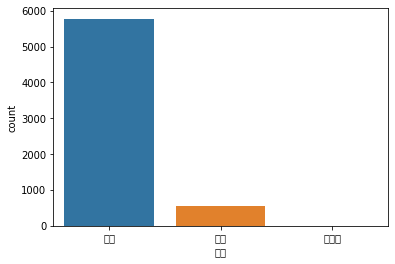

In [0]:
sns.countplot("性別", data=df_merge)